In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
# Define the number of locations and vehicles
num_locations = 20  # Locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Random (x, y) coordinates for each location
depot = (50, 50)  # Central depot location as a fixed point
num_vehicles = 3  # Vehicles available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Individual structure. Individuals are lists with a fitness attribute.

In [5]:
# Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Tracking distance traveled by each vehicle for balance calculation
    # Splitting the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # The evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # The crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # The mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # The selection function using tournament selection

In [8]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plotting locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	592.454	2.83736
1  	213   	576.16 	2.50787
2  	243   	565.997	6.35454
3  	232   	554.527	5.94407
4  	233   	550.086	1.28352
5  	218   	545.758	1.44864
6  	213   	537.494	3.97339
7  	233   	539.22 	4.06337
8  	219   	534.25 	4.73921
9  	209   	522.571	3.97541
10 	224   	520.137	3.2082 
11 	230   	518.321	3.78653
12 	230   	522.536	2.25782
13 	217   	517.298	2.89698
14 	231   	515.601	1.48864
15 	250   	513.224	6.27712
16 	238   	507.392	4.98212
17 	236   	500.894	4.4124 
18 	225   	493.859	6.28748
19 	225   	497.63 	3.28021
20 	209   	484.081	3.28021
21 	232   	486.935	4.1926 
22 	237   	480.495	5.09066
23 	217   	480.772	3.71646
24 	227   	475.016	1.7132 
25 	246   	473.813	5.60551
26 	233   	461.663	8.02715
27 	219   	455.559	6.94729
28 	229   	447.805	1.37662
29 	223   	436.971	4.54877
30 	238   	446.636	4.49498
31 	225   	448.399	3.26287
32 	221   	442.095	3.91569
33 	243   	421.102	6.90888
34 	232   	396.268	0.800277
35 	244   	380.235	6.46274 

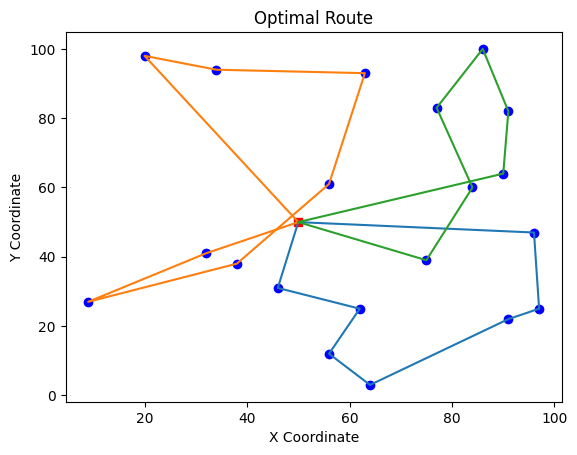

In [9]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()